In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../results/complete.csv')
df['crc'] = df['crc'].str.upper()

In [3]:
df = df.drop(columns='runs')
df = df.replace(".out","", regex=True)

# Raw Average Results

In [4]:
means = df.groupby(['test','crc','program']).mean()
means

bundles/second
test     crc    program                           
Creating CRC_16 bp7-go-v0.1.native         19319.5
                bp7-go-v0.2.native         19736.0
                bp7-go-v0.2.wasm            2618.5
                bp7-rs.native             101213.5
                bp7-rs.wasm                93204.0
         CRC_32 bp7-go-v0.1.native         19419.5
                bp7-go-v0.2.native         19573.5
                bp7-go-v0.2.wasm            2618.5
                bp7-rs.native              94938.5
                bp7-rs.wasm                93116.5
         CRC_NO bp7-go-v0.1.native         18168.0
                bp7-go-v0.2.native         20427.0
                bp7-go-v0.2.wasm            2874.5
                bp7-rs.native             116599.0
                bp7-rs.wasm               101967.0
Encoding CRC_16 bp7-go-v0.1.native         62429.0
                bp7-go-v0.2.native        286419.5
                bp7-go-v0.2.wasm           18838.0
                bp7-rs.native             698623.0
                bp7-rs.wasm              1018019.0
         CRC_32 bp7-go-v0.1.native         63166.5
                bp7-go-v0.2.native        287868.5
                bp7-go-v0.2.wasm           18880.5
                bp7-rs.native             695804.0
                bp7-rs.wasm               993973.5
         CRC_NO bp7-go-v0.1.native         68792.5
                bp7-go-v0.2.native        480773.5
                bp7-go-v0.2.wasm           34768.0
                bp7-rs.native            2071187.5
                bp7-rs.wasm              3234531.0
Loading  CRC_16 bp7-go-v0.1.native         50997.5
                bp7-go-v0.2.native         47799.5
                bp7-go-v0.2.wasm           10196.5
                bp7-rs.native             670243.0
                bp7-rs.wasm               512654.5
         CRC_32 bp7-go-v0.1.native         45355.5
                bp7-go-v0.2.native         49519.0
                bp7-go-v0.2.wasm            9786.5
                bp7-rs.native             688541.0
                bp7-rs.wasm               504449.5
         CRC_NO bp7-go-v0.1.native        108998.0
                bp7-go-v0.2.native         51984.0
                bp7-go-v0.2.wasm           13377.0
                bp7-rs.native             779230.0
                bp7-rs.wasm               535877.0

In [5]:
def get_stats(test_name, crc_type):
    res = df[df['test'] == test_name]
    res_means = res.groupby(['program','crc'], as_index=False).mean()
    res_means.sort_values(by=['crc'])
    return res_means[res_means.crc == crc_type].set_index(['program', 'crc'])

In [6]:
creating_no = get_stats('Creating','CRC_NO')

In [7]:
creating_16 = get_stats('Creating','CRC_16')

In [8]:
creating_32 = get_stats('Creating','CRC_32')

# Bundle Creation

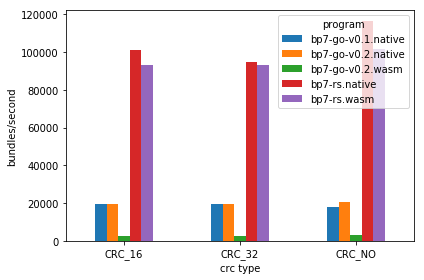

In [9]:
df2 = df[df['test'] == 'Creating']
df2 = df2.groupby(['program','crc','test'], as_index=False).mean()
ax = df2.pivot(index="crc", columns="program", values="bundles/second").plot(kind='bar', rot=0)
ax.set_ylabel("bundles/second")
ax.set_xlabel("crc type")
plt.tight_layout()
plt.savefig("creating.png")

# Bundle Encoding

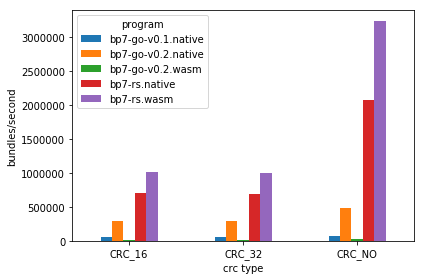

In [10]:
df2 = df[df['test'] == 'Encoding']
df2 = df2.groupby(['program','crc','test'], as_index=False).mean()
ax = df2.pivot(index="crc", columns="program", values="bundles/second").plot(kind='bar', rot=0)
ax.set_ylabel("bundles/second")
ax.set_xlabel("crc type")
plt.tight_layout()
plt.savefig("encoding.png")

# Bundle Decoding

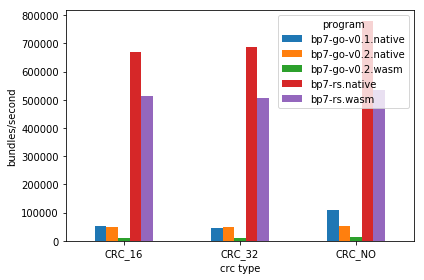

In [11]:
df2 = df[df['test'] == 'Loading']
df2 = df2.groupby(['program','crc','test'], as_index=False).mean()
ax = df2.pivot(index="crc", columns="program", values="bundles/second").plot(kind='bar', rot=0)
ax.set_ylabel("bundles/second")
ax.set_xlabel("crc type")
plt.tight_layout()
plt.savefig("loading.png")

# Binary Sizes

In [25]:
bin_map = {"/src/bp7wasm/target/release/bp7eval" : "bp7-rs.native", 
           "/src/bp7wasm/target/deploy/bp7eval.wasm" : "bp7-rs.wasm",
           "/src/dtn7-go-v0.1/tests/tests" : "bp7-go-v0.1.native",
           "/src/dtn7-go-v0.1/tests/wasm/test.wasm" : "bp7-go-v0.1.wasm",
           "/src/dtn7-go-v0.2/tests/tests" : "bp7-go-v0.2.native",
           "/src/dtn7-go-v0.2/tests/wasm/test.wasm" : "bp7-go-v0.2.wasm",
          }
df = pd.read_csv('../results/binary.sizes.txt', sep=' ', header=None, names=["size", "binary"])
df = df.replace(bin_map)
df

,size,binary
0,411992,bp7-rs.native
1,433009,bp7-rs.wasm
2,10490256,bp7-go-v0.1.native
3,17654129,bp7-go-v0.1.wasm
4,1945448,bp7-go-v0.2.native
5,3406923,bp7-go-v0.2.wasm


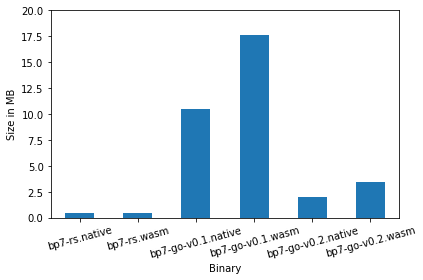

In [26]:
df["size"] = df["size"].div(1000000)
ax = df.plot(kind='bar', rot=15, x='binary', y='size', legend=False, ylim=(0,20))
ax.set_ylabel('Size in MB')
ax.set_xlabel('Binary')
ax.ticklabel_format(axis = 'y', style = 'plain')
plt.tight_layout()
plt.savefig("binarysizes.png")

# Storage Test

In [29]:
df = pd.read_csv('../results/storagetest.compressed.csv')
df

,msgs,time
0,10000,1559
1,20000,3219
2,30000,4675
3,40000,6363
4,50000,7611
5,60000,10070
6,70000,12370
7,80000,14279
8,90000,15850
9,100000,18387


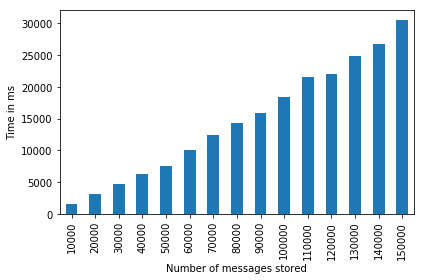

In [33]:
ax = df.plot(kind='bar', y='time', x='msgs', legend=False)
ax.set_ylabel('Time in ms')
ax.set_xlabel('Number of messages stored')
plt.tight_layout()
plt.savefig("storagetest_compressed.png")